In [1]:
# Importação das bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurações para melhor visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [2]:
# Configurando a conexão com o Google Drive

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/cd2309/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Carregando o dataset de exemplo
df = pd.read_csv(path+'boardgame-geek-dataset_organized.csv')

# Exibindo as primeiras linhas
print("Primeiras 5 linhas do dataset:")
print(df.head())

print("\n" + "="*50)
print("Informações gerais do dataset:")
print(df.info())

print("\n" + "="*50)
print("Dimensões do dataset:")
print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")

Primeiras 5 linhas do dataset:
   row_id                          boardgame  release_year  min_players  \
0       1                  Brass: Birmingham          2018            2   
1       2          Pandemic Legacy: Season 1          2015            2   
2       3                           Ark Nova          2021            1   
3       4                         Gloomhaven          2017            1   
4       5  Twilight Imperium: Fourth Edition          2017            3   

   max_players  min_playtime  max_playtime  minimum_age  avg_rating  \
0            4            60           120           14       8.575   
1            4            60            60           13       8.512   
2            4            90           150           14       8.539   
3            4            60           120           14       8.557   
4            6           240           480           14       8.572   

   num_ratings  ...  rank_strategy  rank_thematic  rank_family  rank_war  \
0        53548 

In [11]:
#Informações gerais
print(df.info())
# Identificando dados ausentes
print(df.isna())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_id             2000 non-null   int64  
 1   boardgame          2000 non-null   object 
 2   release_year       2000 non-null   int64  
 3   min_players        2000 non-null   int64  
 4   max_players        2000 non-null   int64  
 5   min_playtime       2000 non-null   int64  
 6   max_playtime       2000 non-null   int64  
 7   minimum_age        2000 non-null   int64  
 8   avg_rating         2000 non-null   float64
 9   num_ratings        2000 non-null   int64  
 10  complexity         2000 non-null   float64
 11  rank_overall       2000 non-null   int64  
 12  owned              2000 non-null   int64  
 13  wishlisted         2000 non-null   int64  
 14  total_plays        2000 non-null   int64  
 15  fans               2000 non-null   int64  
 16  page_views         2000 

In [13]:
# Estatísticas descritivas básicas
print("Estatísticas descritivas para variáveis numéricas:")
print(df.describe(percentiles=None, include=None, exclude=None))


Estatísticas descritivas para variáveis numéricas:
            row_id  release_year  min_players  max_players  min_playtime  \
count  2000.000000   2000.000000  2000.000000  2000.000000   2000.000000   
mean   1000.500000   2010.398500     1.764000     4.944000     57.519000   
std     577.494589     80.765724     0.708911     6.112655     48.646129   
min       1.000000      0.000000     1.000000     1.000000      0.000000   
25%     500.750000   2011.000000     1.000000     4.000000     30.000000   
50%    1000.500000   2017.000000     2.000000     4.000000     45.000000   
75%    1500.250000   2020.000000     2.000000     5.000000     60.000000   
max    2000.000000   2025.000000     8.000000   100.000000    480.000000   

       max_playtime  minimum_age   avg_rating    num_ratings   complexity  \
count   2000.000000  2000.000000  2000.000000    2000.000000  2000.000000   
mean      88.699000    11.342500     7.420455    9244.914000     2.537535   
std       89.119614     2.424486 

In [15]:
# Calculando media de pontos
if 'rating_9' in df.columns:
    ponto = df['rating_9'].dropna()
    print(f"Média dos pontos dos jogadores: {ponto.mean():.2f}")

# Desvio padrao
if 'max_playtime' in df.columns:
    tempo = df['max_playtime'].dropna()
    print(f"Média do tempo dos jogadores: {tempo.mean():.2f}")
    print(f"Desvio Padrão do tempo: {tempo.std():.2f}")

#Verificando valores nulos
df.isnull().sum()
print('Dependendo dos nulos as analises futuras poderão ser afetadas')

Média dos pontos dos jogadores: 1466.40
Média do tempo dos jogadores: 88.70
Desvio Padrão do tempo: 89.12
Dependendo dos nulos as analises futuras poderão ser afetadas


In [18]:
#valores nulos da coluna "average_rating"
print(df['avg_rating'].isnull().sum())
print("Não tem valores nulos ")

0
Não tem valores nulos 


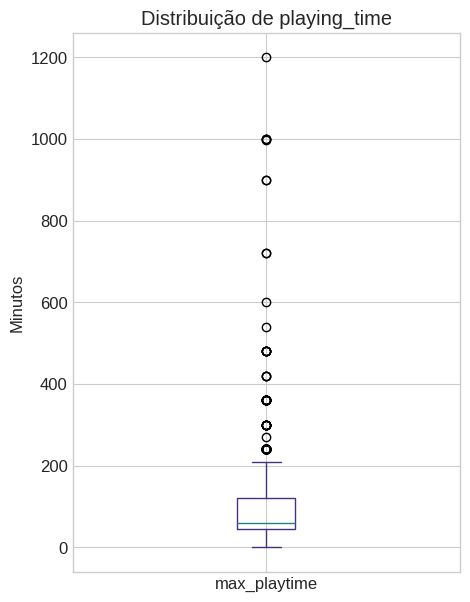

In [57]:
#boxplot
df['max_playtime'].plot(kind='box', figsize=(5,7), title='Distribuição de playing_time')
plt.ylabel("Minutos")
plt.show()

In [56]:
# Quartis
qt1 = df['max_playtime'].quantile(0.25)
qt3 = df['max_playtime'].quantile(0.75)

IQR = qt3 - qt1

# Limites para outliers
limiteinferior = qt1 - 1.5 * IQR
limitesuperior = qt3 + 1.5 * IQR

# Filtrando
outliers = df[(df['max_playtime'] < limiteinferior) | (df['max_playtime'] > limitesuperior)]

# Quantidade de outliers
qtdoutliers = outliers.shape[0]

print("qt1:", qt1)
print("qt3:", qt3)
print("IQR:", IQR)
print("Limite inferior:", limiteinferior)
print("Limite superior:", limitesuperior)
print("Quantidade de outliers:", qtdoutliers)

qt1: 45.0
qt3: 120.0
IQR: 75.0
Limite inferior: -67.5
Limite superior: 232.5
Quantidade de outliers: 108


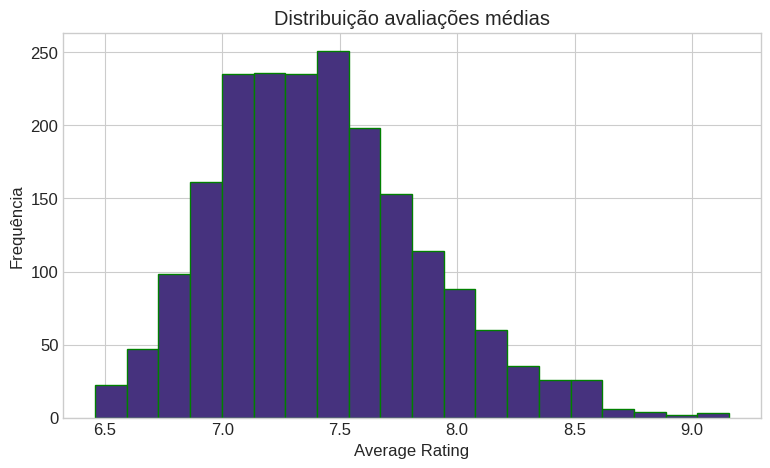

In [55]:
# Histograma da coluna 'average_rating'
df['avg_rating'].plot(kind='hist', bins=20, edgecolor='green', figsize=(9,5), title='Distribuição avaliações médias')
plt.xlabel("Average Rating")
plt.ylabel("Frequência")
plt.show()

In [31]:
print("A distribuição não é igual")

A distribuição não é igual


In [32]:
#transformação logaritima
df["max_playtime_log10"] = np.log10(df["max_playtime"])
print(df[["max_playtime", "max_playtime_log10"]])

      max_playtime  max_playtime_log10
0              120            2.079181
1               60            1.778151
2              150            2.176091
3              120            2.079181
4              480            2.681241
...            ...                 ...
1995            75            1.875061
1996           300            2.477121
1997            30            1.477121
1998          1200            3.079181
1999            45            1.653213

[2000 rows x 2 columns]


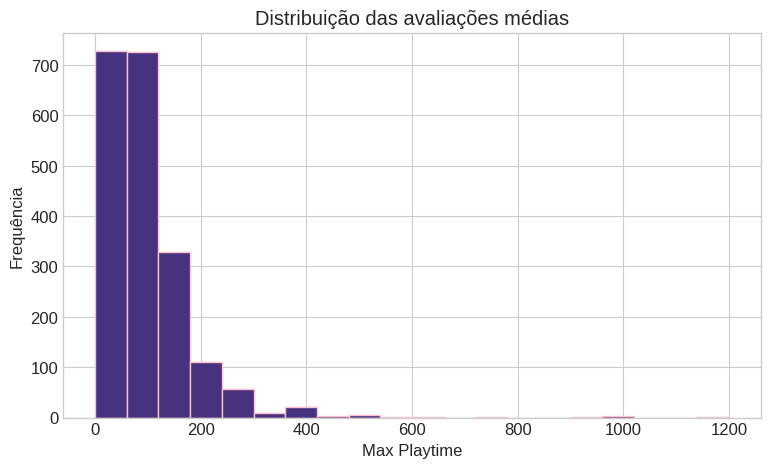

In [54]:
# Histograma da coluna 'average_rating'
df['max_playtime'].plot(kind='hist', bins=20, edgecolor='pink', figsize=(9,5), title='Distribuição das avaliações médias')
plt.xlabel("Max Playtime")
plt.ylabel("Frequência")
plt.show()

<Axes: xlabel='min_players', ylabel='max_players'>

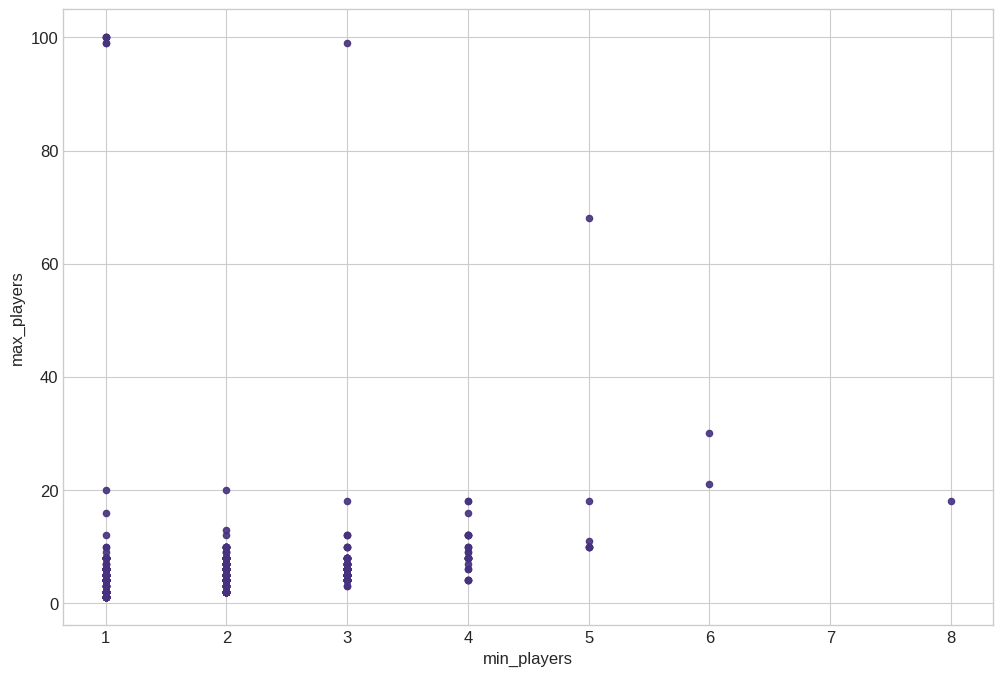

In [53]:
# Grafico de dispersão
df.plot.scatter(x="min_players", y="max_players", alpha=0.9)

In [38]:
#identificação
print("A correlação é positiva, mas não é linear, possui muitos outliers.")

A correlação é positiva, mas não é linear, possui muitos outliers.


In [39]:
#Matriz de correlação
correlacao_matrix = df.corr(numeric_only=True)
print("Matriz de correlação:\n", correlacao_matrix)

Matriz de correlação:
                       row_id  release_year  min_players  max_players  \
row_id              1.000000     -0.014429     0.043090     0.005884   
release_year       -0.014429      1.000000    -0.068804    -0.181897   
min_players         0.043090     -0.068804     1.000000     0.098884   
max_players         0.005884     -0.181897     0.098884     1.000000   
min_playtime       -0.037907      0.005583     0.021599    -0.039336   
max_playtime       -0.060282      0.003039    -0.104290    -0.038726   
minimum_age        -0.179940      0.119558    -0.141552    -0.097742   
avg_rating         -0.477495      0.060397    -0.254746    -0.044696   
num_ratings        -0.509106     -0.030488     0.076977     0.035725   
complexity         -0.222102      0.004491    -0.231912    -0.116246   
rank_overall        0.999998     -0.014435     0.043144     0.005868   
owned              -0.487035     -0.021210     0.049335     0.035908   
wishlisted         -0.645814      0.03389

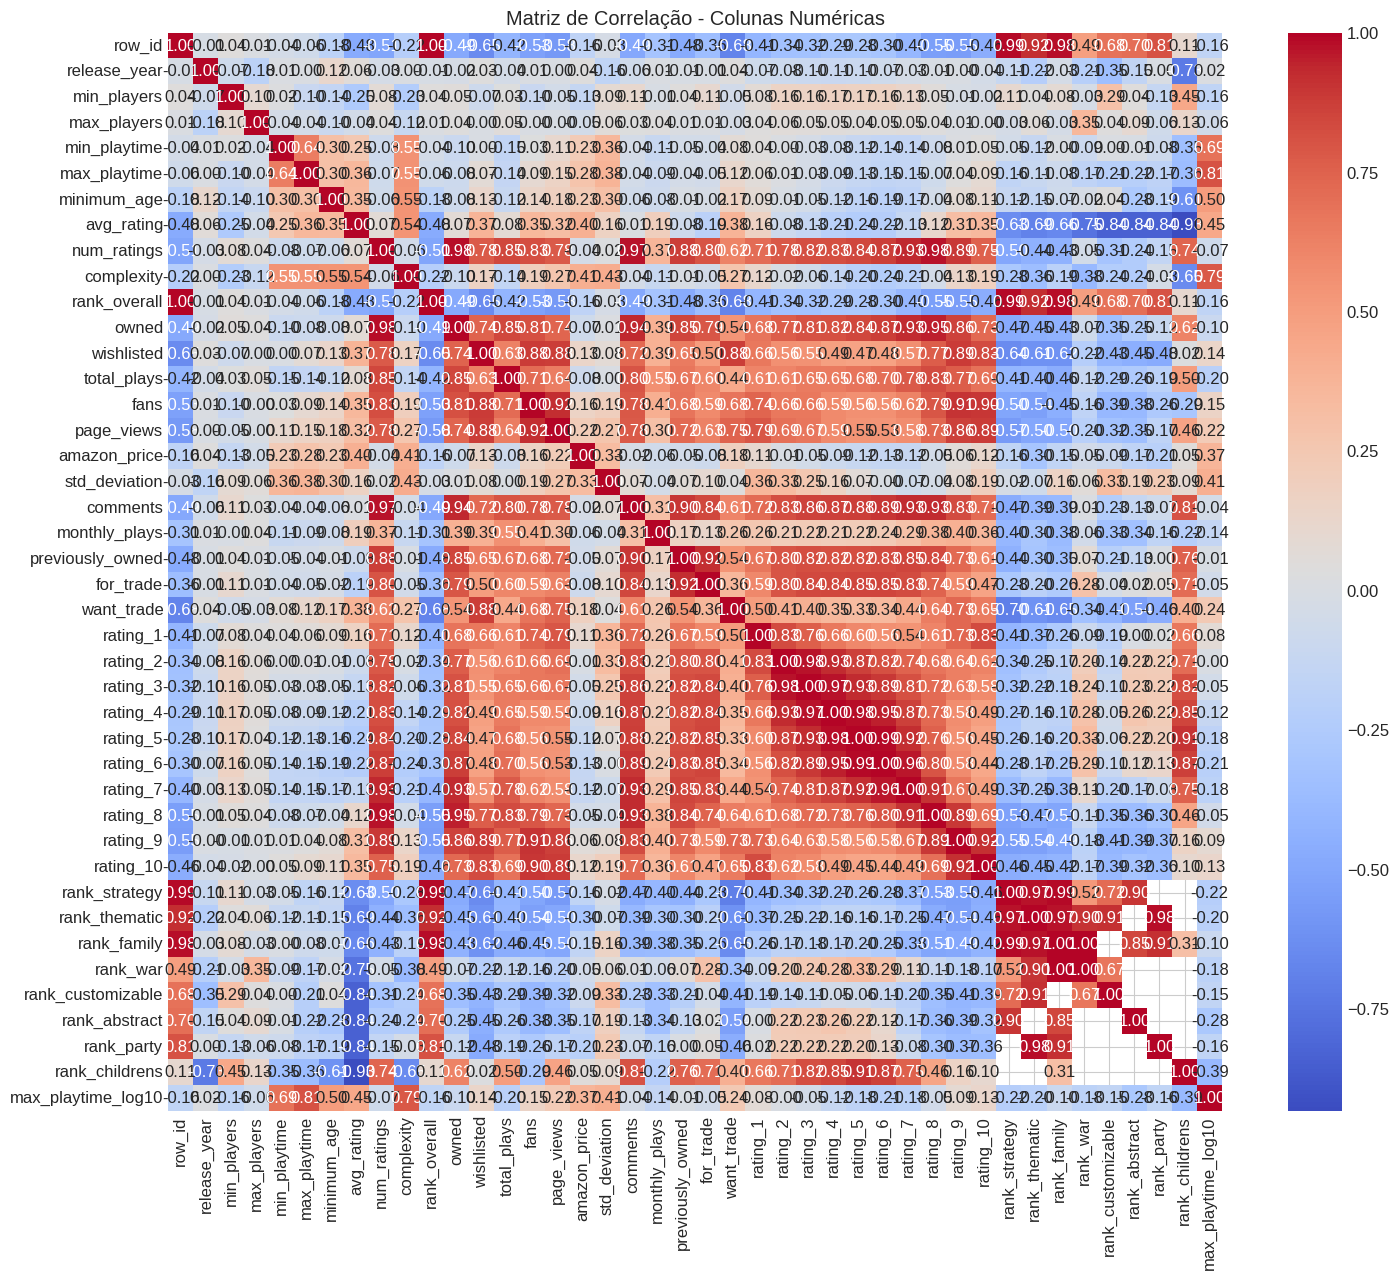

In [43]:
# Mapa de calor
plt.figure(figsize=(17, 14))
sns.heatmap(correlacao_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação - Colunas Numéricas")
plt.show()

In [47]:
# nova tabela decada
df['Decada'] = (df['release_year'] // 10) * 10
print(df[['release_year', 'Decada']].head())

   release_year  Decada
0          2018    2010
1          2015    2010
2          2021    2020
3          2017    2010
4          2017    2010


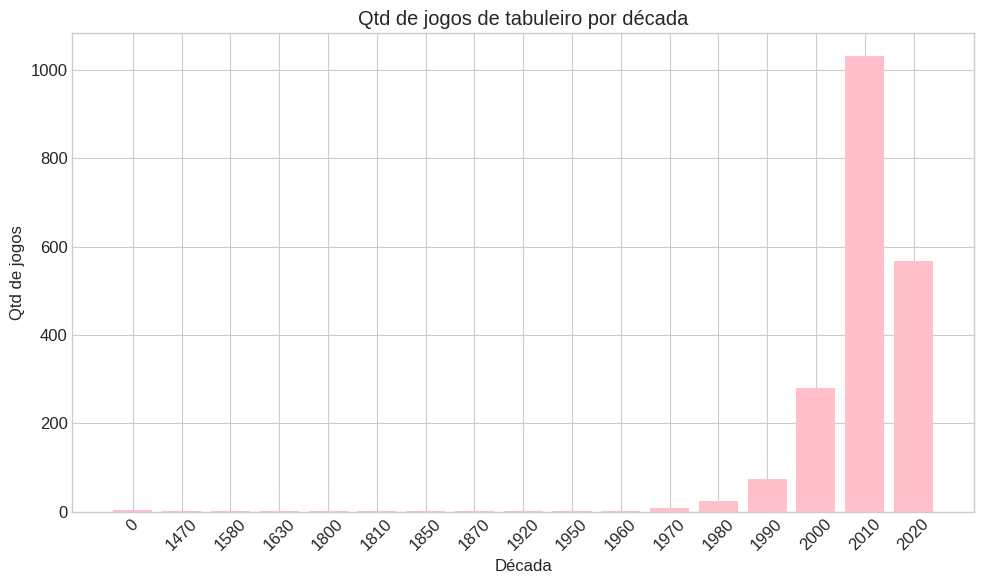

In [49]:
# Decada com mais lançamentos
contagempdecada = df.groupby('Decada').size().reset_index(name='Qtd')
plt.figure(figsize=(10,6))
plt.bar(contagempdecada['Decada'].astype(str), contagempdecada['Qtd'], color='pink')
plt.xlabel('Década')
plt.ylabel('Qtd de jogos')
plt.title('Qtd de jogos de tabuleiro por década')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
# A decada de 2010, pois teve mais d 1000 jogos lançados